In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.append("..")

from src.datasets.sky_cover_dataset import SkyCoverModule
from src.config import SEED

c:\Users\arnau\cours\lipid_internship\git\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sky_cover_module = SkyCoverModule(
    batch_size=1,
    n_workers=1,
    seed=SEED
)
sky_cover_module.setup(stage="fit")
sky_cover_module.setup(stage="test")
train_dataloader = sky_cover_module.train_dataloader()
val_dataloader = sky_cover_module.val_dataloader()
test_dataloader = sky_cover_module.test_dataloader()

🌱 Setting the seed to 0 for generating dataloaders.
🌱 Setting the seed to 0 for generating dataloaders.


In [4]:
it = iter(test_dataloader)

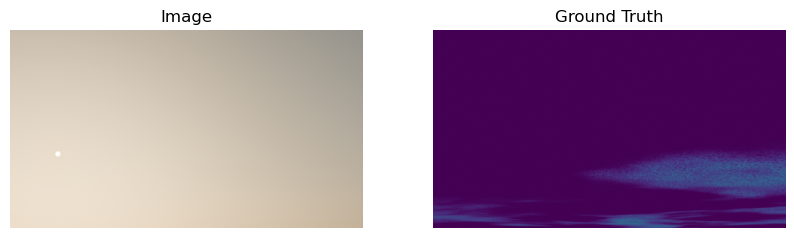

In [5]:
def unnormalize(
        image,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ):
    image = image.copy()
    image = image * std + mean
    image = image.clip(0, 1)
    return image

batch = next(it)
image = batch[0][0]
ground_truth = batch[1][0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(unnormalize(image.numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.imshow(ground_truth.numpy().transpose(1, 2, 0), vmin=0, vmax=1)
plt.axis("off")
plt.show()